In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import seaborn as sns
from math import sqrt
from scipy.sparse import csr_matrix
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import lil_matrix, save_npz, load_npz
from typing import List, Dict
from tqdm import tqdm

sns.set_style('whitegrid')

In [3]:
train = pd.read_csv('train_10k.csv')
test = pd.read_csv('test_10k.csv')

In [4]:
train

,user_id,song_id,play_count,title,release,artist_name,year,genre,artist_country,artist_city
0,d4e2a1187bd88b3d1799371325e0b3565cffa423,SOJYDZB12AF72A812B,1,Backyard,The Express,Belleruche,2008,r&b,United Kingdom,London
1,c2b4ca628ee595dda590d92c3a4ff6238a4fd956,SOFJIZM12A58A7F878,5,Sunshine (Feat. Anthony Hamilton) (Edited Albu...,Kamikaze,Twista,2004,rap,United States,Chicago
2,9560966fa5a7d4785a96b542a4b8a4ce1de4258e,SOXJXWR12A8C13E5FC,5,Stay Strong,The Ultimate Collection,Newsboys,2007,gospel & religious,Australia,Mooloolaba
3,4c16505b4c9fcf193faaa37e4d66fe4a63916973,SOUEEWG12A8C139E61,1,Tone Bank Jungle,Holy Fuck,Holy Fuck,2005,electronic,Canada,Toronto
4,388c4f4a5c87393c6d7f7996064f3fca2ea7afcd,SOXMCEI12A8C132688,2,It's Oh So Quiet,Post Live,Björk,1995,rock,Iceland,Reykjavík
...,...,...,...,...,...,...,...,...,...,...
250898,97cfaa113b466a852b656fb1def511e7d79a0e41,SOAGUOR12A8C13AF1E,1,Long Thin Dawn,United Artists Collection_ The,Gordon Lightfoot,1968,folk,Canada,Orillia
250899,42c4dae1c5efb4d73b894cf9a1d31a687c972744,SOBMSIJ12AB017FAD5,2,Man Needs Woman,Burnin' Sky,Bad Company,1977,rock,United Kingdom,London
250900,aaa5885a97f9af8683470d4c61075e92fceeb85d,SOIICUT12A8C137ECC,1,Caught,Everything Sucks,Descendents,1996,rock,United States,Manhattan Beach
250901,9f038f1458da6df25cbecf8f1d43bc0d2b17ae32,SOLZEED12A6D4FA8C9,4,You Know I'm No Good,You Know I'm No Good - GFK Version,Amy Winehouse,2006,r&b,United Kingdom,Southgate


In [5]:
import ast

In [6]:
with open('users_10k_id_for_sparse.txt') as f:
    lines = f.readlines()
m = lines[0]
users_dict = ast.literal_eval(m)

In [7]:
len(users_dict)

10000

In [8]:
with open('songs_10k_id_for_sparse.txt') as f:
    lines = f.readlines()
m = lines[0]
song_dict = ast.literal_eval(m)

In [9]:
train["user_id"] = train["user_id"].map(users_dict)

In [10]:
train["song_id"] = train["song_id"].map(song_dict)

In [17]:
test["user_id"] = test["user_id"].map(users_dict)
test["song_id"] = test["song_id"].map(song_dict)

In [11]:
len(train["user_id"].unique())

10000

In [12]:
train

,user_id,song_id,play_count,title,release,artist_name,year,genre,artist_country,artist_city
0,8359,6001,1,Backyard,The Express,Belleruche,2008,r&b,United Kingdom,London
1,7638,3357,5,Sunshine (Feat. Anthony Hamilton) (Edited Albu...,Kamikaze,Twista,2004,rap,United States,Chicago
2,5815,13488,5,Stay Strong,The Ultimate Collection,Newsboys,2007,gospel & religious,Australia,Mooloolaba
3,3008,11774,1,Tone Bank Jungle,Holy Fuck,Holy Fuck,2005,electronic,Canada,Toronto
4,2236,13520,2,It's Oh So Quiet,Post Live,Björk,1995,rock,Iceland,Reykjavík
...,...,...,...,...,...,...,...,...,...,...
250898,5917,157,1,Long Thin Dawn,United Artists Collection_ The,Gordon Lightfoot,1968,folk,Canada,Orillia
250899,2648,930,2,Man Needs Woman,Burnin' Sky,Bad Company,1977,rock,United Kingdom,London
250900,6659,5096,1,Caught,Everything Sucks,Descendents,1996,rock,United States,Manhattan Beach
250901,6213,7217,4,You Know I'm No Good,You Know I'm No Good - GFK Version,Amy Winehouse,2006,r&b,United Kingdom,Southgate


In [19]:
test

,user_id,song_id,play_count,title,release,artist_name,year,genre,artist_country,artist_city
0,1616,5131,1,Happy Guy,Punk In Drublic,NOFX,1994,rock,United States,Los Angeles
1,5417,8146,2,Xeroxed,XX,Mushroomhead,1999,rock,United States,Cleveland
2,5804,2339,1,Music Now,Sings The Greys,Frightened Rabbit,2006,rock,United Kingdom,Selkirk
3,6880,582,1,All At Once,Sleep Through The Static,Jack Johnson,2008,pop,United States,Hauʻula
4,747,3070,1,Test,On The Ellipse,Bardo Pond,2003,rock,United States,Philadelphia
...,...,...,...,...,...,...,...,...,...,...
62721,5060,10601,1,Put the to Death,Eaten Back To Life,Cannibal Corpse,1990,pop_rock,United States,Buffalo
62722,5533,11638,1,Chant,Alexander (Original Motion Picture Soundtrack),Vangelis,2004,soundtrack,Greece,Thessalia
62723,8119,3576,1,Blood Music,We Are Night Sky,deadboy & the Elephantmen,2005,rock,United States,Houma
62724,3194,2236,1,Move Higher,Clubbers Guide Electro,Sub Focus Feat. Culture Shock,2009,electronic,United Kingdom,Guildford


In [13]:
user_encoder = LabelEncoder()
item_encoder = LabelEncoder()

train['user_id'] = user_encoder.fit_transform(train['user_id'])
train['song_id'] = item_encoder.fit_transform(train['song_id'])

num_users, num_songs = train.user_id.nunique(), train.song_id.nunique()
num_users, num_songs

(10000, 14023)

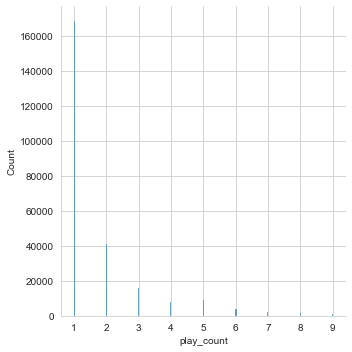

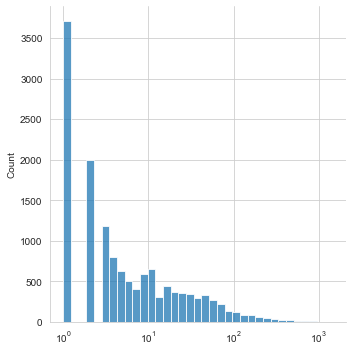

In [14]:
sns.displot(train.play_count, height=5);
sns.displot(train.groupby('song_id').size(), log_scale=True, height=5);

In [15]:
def ALS(users: List, items: List, ratings: List, num_users: int, num_items: int, dim=64, n_iters=1, eps=1e-7):
    R = csr_matrix((ratings, (users, items)), shape=(num_users, num_items))
    print(R.shape)
    P = np.random.randn(num_users, dim)
    Q = np.random.randn(num_items, dim)
    
    for t in tqdm(range(n_iters)):
        RQ = R @ Q
        for u in range(num_users):
            relevant_items = items[users == u]
            Q_rel = Q[relevant_items]
            QQ = Q_rel.reshape(-1, dim, 1) * Q_rel.reshape(-1, 1, dim)
            P[u] = np.linalg.inv(QQ.sum(axis=0) + eps * np.eye(dim)) @ RQ[u]

        RP = R.T @ P
        for i in range(num_items):
            relevant_users = users[items == i]
            P_rel = P[relevant_users]
            PP = P_rel.reshape(-1, dim, 1) * P_rel.reshape(-1, 1, dim)
            Q[i] = np.linalg.inv(PP.sum(axis=0) + eps * np.eye(dim)) @ RP[i]
    
    return P, Q

In [16]:
P, Q = ALS(train.user_id, train.song_id, train.play_count, num_users, num_songs, n_iters=5)


(10000, 14023)


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [03:02<00:00, 36.46s/it]


In [31]:
def remove_train_items(preds, k):
    new_preds = np.zeros((preds.shape[0], k), dtype=np.int)
    for user, data in train.groupby('user_id'):
        user_preds = preds[user]
        new_preds[user] = user_preds[~np.in1d(user_preds, data.song_id)][:k]
    return new_preds


def get_ALS_preds(U, V, k=10):
    preds = np.argsort(U @ V.T, axis=1)
    preds = remove_train_items(preds, k)
    return preds


def get_random_preds(k=10):
    preds = np.tile(np.arange(num_songs), (num_users, 1))
    for i in range(num_users):
        rand_perm = np.random.permutation(num_songs)
        preds[i] = preds[i][rand_perm]

    preds = remove_train_items(preds, k)
    return preds

def get_toppop_preds(freq=10, k=10):
    mean_rating = train.groupby('song_id').play_count.mean()
    mean_rating = mean_rating[train.groupby('song_id').size() >= freq]
    preds = np.array(mean_rating.sort_values(ascending=False).index)
    preds = np.tile(preds, (num_users, 1))
    preds = remove_train_items(preds, k)
    return preds


def MAP_k(true, pred, k):
    m = 0
    num = min(len(true), len(pred))
    for tr, pr in zip(true, pred):
        if not tr:
            continue
        tr_in_pr = np.isin(pr[:k], tr)
        m += (tr_in_pr / np.arange(1, k + 1)).sum() / (1 / np.arange(1, len(tr) + 1)).sum()
    m = m / num
    return m

In [32]:
true_relevant = []
for user, data in test[test.play_count >= 3].groupby('user_id'):
    true_relevant += [data.song_id.tolist()]

In [33]:
true_relevant

[[11156],
 [13378],
 [11182, 13423, 8823],
 [5269],
 [8597],
 [7216, 12707, 5640],
 [2872, 8836],
 [6069, 7708],
 [3808],
 [12946, 8307],
 [11077],
 [12031],
 [14328, 5078],
 [7665],
 [5320],
 [11453, 1547, 1789],
 [4788, 12007, 2437],
 [2826],
 [11802, 7443, 3521, 8819, 1315],
 [14039, 10949],
 [12821],
 [12242, 7716],
 [1259],
 [109, 14811],
 [5086, 11775],
 [11941],
 [8243],
 [10795],
 [1212],
 [14187],
 [14043, 4839, 11156],
 [12267, 14117],
 [8193, 13290, 3190],
 [7866, 9291],
 [12318],
 [12505, 10250],
 [11651],
 [424, 6172],
 [3651],
 [7453],
 [8923, 10250, 1212],
 [11271],
 [6012, 6151, 6529],
 [10120, 4881],
 [4777, 12007, 283],
 [1832],
 [13178],
 [14647],
 [3309],
 [1577],
 [680],
 [11204],
 [1074],
 [5097],
 [9181],
 [8760],
 [6890, 3177],
 [12337, 12640],
 [14748, 48],
 [1378],
 [3649, 13906],
 [9805, 13520],
 [7736],
 [7900],
 [2970],
 [9427],
 [7082],
 [8695],
 [13310, 10248, 6798, 4390],
 [938],
 [8418],
 [8786, 6841],
 [480, 8627],
 [5020],
 [13986],
 [6885, 7166, 9846

In [35]:
ks = np.arange(1, 20)
als_preds = get_ALS_preds(P, Q, k=ks[-1])
random_preds = get_random_preds(k=ks[-1])
top_preds = get_toppop_preds(freq=10, k=ks[-1])

random_map_k = [MAP_k(true_relevant, random_preds, k=k) for k in ks]
top_map_k = [MAP_k(true_relevant, top_preds, k=k) for k in ks]
als_map_k = [MAP_k(true_relevant, als_preds, k=k) for k in ks]

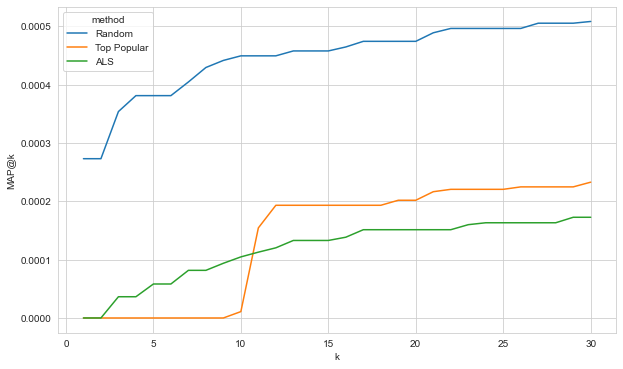

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(ks, random_map_k, label='Random')
plt.plot(ks, top_map_k, label='Top Popular')
plt.plot(ks, als_map_k, label='ALS')

plt.legend(title='method')
plt.xlabel('k')
plt.ylabel('MAP@k')
plt.show()

In [49]:
def AR_k(true, pred, k):
 
    if not true:
        return 0.0
    
    if len(pred)>k:
        pred = pred[:k]

    score = 0.0
    hits = 0.0

    for i, p in enumerate(pred):
        if p in true and p not in pred[:i]:
            hits += 1.0
            score += hits / (i+1.0)

    return score / len(true)

def MAR_k(true, pred, k):
    
    return np.mean([AR_k(a,p,k) for a,p in zip(true, pred)])


In [50]:
ks = np.arange(1, 31)
# als_preds = get_ALS_preds(P, Q, k=ks[-1])
# random_preds = get_random_preds(k=ks[-1])
# top_preds = get_toppop_preds(freq=10, k=ks[-1])

random_map_k = [MAR_k(true_relevant, random_preds, k=k) for k in ks]
top_map_k = [MAR_k(true_relevant, top_preds, k=k) for k in ks]
als_map_k = [MAR_k(true_relevant, als_preds, k=k) for k in ks]

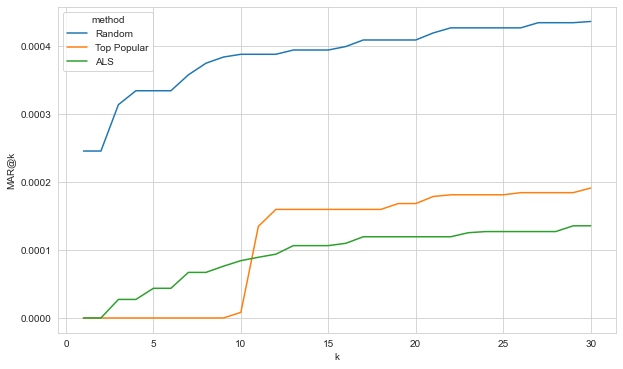

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(ks, random_map_k, label='Random')
plt.plot(ks, top_map_k, label='Top Popular')
plt.plot(ks, als_map_k, label='ALS')

plt.legend(title='method')
plt.xlabel('k')
plt.ylabel('MAR@k')
plt.show()